<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.B - Grafos </h2>
</center>
</p>
</div>


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0 - Depth-First Search</p></h2>
  
  <p>
  El objetivo de _Depth First Search_ (DFS) es el mismo que el de BFS, encontrar un camino entre dos puntos del grafo
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Depth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Grafo sobre el que buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El índice del nodo al que queremos llegar.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final, __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El número de nodos que se han visitado para encontrar la solución.</li>
<ul>

</p>

</div>

In [1]:
def dfs(G, origen, destino):    
    s = [origen]
    e = 1
    seen = {n: False for n in G.nodes}
    found = False 
    
    for n in G.nodes:
        G.node[n]["from"] = []
    
    # Algortime iteratiu DFS
    while len(s) > 0 and found is False:
        v = s.pop()
        
        if not seen[v]:
            seen[v] = True
            
            for w in G.neighbors(v):
                G.node[w]["from"].append(v)
                s.append(w)
                e += 1
                
                if w == destino:
                    found = True
                    break
    
    # Backtracking
    path = []
    parent = destino

    while True:
        path.insert(0, parent)
        
        if parent == origen:
            break
            
        parent = G.node[parent]["from"][0]
    
    return {"expanded": e, "path": path}

In [2]:
import networkx as nx
from json import dumps

G = nx.generators.barabasi_albert_graph(10001, 31)
print(dumps(dfs(G, 1, 666), indent=3))

{
   "expanded": 14011,
   "path": [
      1,
      9944,
      1918,
      9670,
      124,
      9587,
      666
   ]
}


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Componentes conexos</p></h2>
  <p>
    Para este ejercicio deberéis implementar una función que identifique los distintos componentes conexos de un grafo. Esto es, agrupar todos los nodos que estén conectados por un camino.
  </p>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Objeto de tipo grafo sobre el cual buscaremos componentes conexos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _'componentes'_ __: Una lista de listas. Cada sub-lista contendrá los índices de los nodos de uno de los componentes conexos.</li>
<ul>

</p>

</div>

En aquest cas definim la versió recursiva de DFS. Nesecitem recorrer tota una component conexe. 

No ens importa trobar cap camí, per aquesta raó la versió recursiva m'ha semblat més adient.

In [3]:
def dfs_rec(G, origen, visited=[]):
    for w in G.neighbors(origen):
        if w not in visited:
            visited.append(w)
            dfs_rec(G, w, visited)    
    return visited

In [4]:
from random import choice

def cnx(G):
    nodes_set = set(G.nodes)
    components = []
    visited = set()
    
    # Anem cridant def_rec sobre nodes random
    # que no estan en visited i anirem trobant
    # totes les components
    
    while visited != nodes_set:
        begin = choice(list(nodes_set - visited))
        c = dfs_rec(G, begin, [])
        
        if len(c) == 0:
            c = [begin]
        
        components.append(c)
        visited |= set(c)
        
    return components

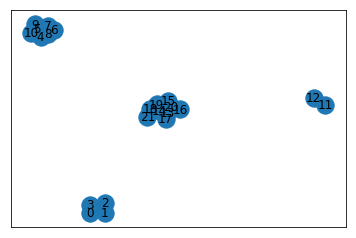

In [5]:
%matplotlib inline
from utils import draw, random_multiple_component_graph

G = random_multiple_component_graph(n=3, e=10, c=3)
draw(G)

In [6]:
for i, c in enumerate(cnx(G)):
    print(f"Component #{i+1:02}: {c}")

Component #01: [0, 1, 2, 3]
Component #02: [5, 4, 6, 7, 8, 9, 10]
Component #03: [13, 15, 14, 17, 16, 19, 18, 20, 21]
Component #04: [12, 11]
